#Import Libraries

In [1]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 189 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 


In [2]:
from fastai.vision import *
from fastai import *


In [3]:
from fastai.vision.all import *


#Load Dataset

In [4]:
path = Path('/content/drive/My Drive/dataset/')

In [5]:
files = get_image_files(path/"with_mask")+get_image_files(path/"without_mask")
len(files)

4092

In [6]:
classes=['with_mask','without_mask']

In [7]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2,item_tfms=Resize(224))

In [8]:
dls.valid_ds.items[:3]

[Path('/content/drive/My Drive/dataset/without_mask/1_0_anhu_0113.jpg'),
 Path('/content/drive/My Drive/dataset/without_mask/2020-06-23-120107 (copy).jpg'),
 Path('/content/drive/My Drive/dataset/with_mask/0_0_1 copy 39.jpg')]

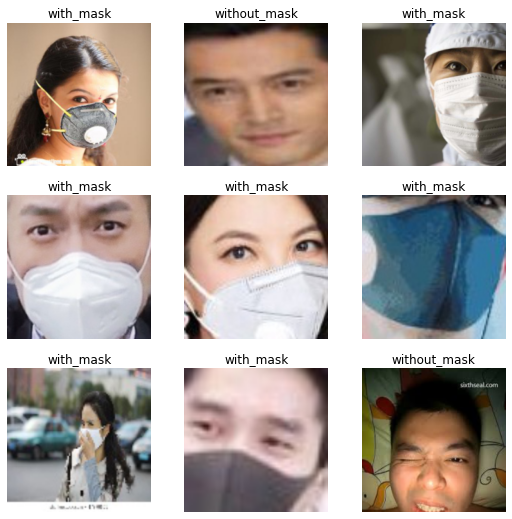

In [9]:
dls.show_batch()

# Build the Model using fastai

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.299890,0.063094,0.019560,04:22


epoch,train_loss,valid_loss,error_rate,time
0,0.046557,0.037253,0.004890,00:24


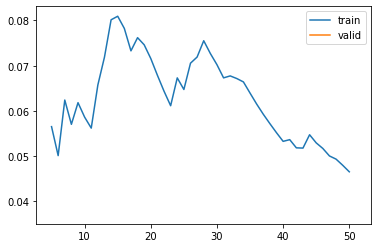

In [11]:
learn.recorder.plot_loss()

#Make Predictions on custom input

In [22]:
#downloading a random image without mask
!wget https://media.socastsrm.com/wordpress/wp-content/blogs.dir/1956/files/2021/05/tom-cruise.jpg

--2022-01-12 21:15:18--  https://media.socastsrm.com/wordpress/wp-content/blogs.dir/1956/files/2021/05/tom-cruise.jpg
Resolving media.socastsrm.com (media.socastsrm.com)... 65.8.249.85, 65.8.249.67, 65.8.249.128, ...
Connecting to media.socastsrm.com (media.socastsrm.com)|65.8.249.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23392 (23K) [image/jpeg]
Saving to: ‘tom-cruise.jpg.1’

tom-cruise.jpg.1    100%[===================>]  22.84K  --.-KB/s    in 0.003s  

2022-01-12 21:15:18 (7.23 MB/s) - ‘tom-cruise.jpg.1’ saved [23392/23392]



In [21]:
pred_class=learn.predict("/content/tom-cruise.jpg")
pred_class[0]

'without_mask'

In [15]:
#downloading a random image with mask
!wget https://assets.reebok.com/images/h_840,f_auto,q_auto:sensitive,fl_lossy,c_fill,g_auto/28e7116674584c20826fabb300a9ccb7_9366/Face_Covers_M-L_3-Pack_Black_H18222_01_standard.jpg


--2022-01-12 21:12:39--  https://assets.reebok.com/images/h_840,f_auto,q_auto:sensitive,fl_lossy,c_fill,g_auto/28e7116674584c20826fabb300a9ccb7_9366/Face_Covers_M-L_3-Pack_Black_H18222_01_standard.jpg
Resolving assets.reebok.com (assets.reebok.com)... 72.246.253.36, 2600:1408:5400:385::11b3, 2600:1408:5400:389::11b3
Connecting to assets.reebok.com (assets.reebok.com)|72.246.253.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91380 (89K) [image/jpeg]
Saving to: ‘Face_Covers_M-L_3-Pack_Black_H18222_01_standard.jpg’

Face_Covers_M-L_3-P 100%[===================>]  89.24K  --.-KB/s    in 0.02s   

2022-01-12 21:12:40 (3.60 MB/s) - ‘Face_Covers_M-L_3-Pack_Black_H18222_01_standard.jpg’ saved [91380/91380]



In [19]:
pred_class = learn.predict("/content/Face_Covers_M-L_3-Pack_Black_H18222_01_standard.jpg")
pred_class[0]

'with_mask'

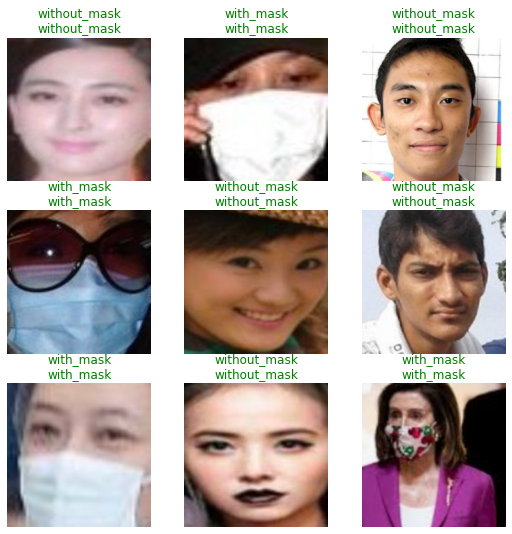

In [20]:
learn.show_results()

#Save the model

In [ ]:
learn.save("mask_model")

Path('/content/drive/My Drive/dataset/models/mask_model.pth')

In [ ]:
learn.export()